In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [21]:
x_train = x_train/255.0
x_test = x_test/255.0

In [22]:
labels = set(y_train)

In [23]:
x_train.shape

(60000, 28, 28)

In [25]:
i = Input(shape=x_train.shape[1:])
x = LSTM(64, activation="sigmoid")(i)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          23,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,458 (95.54 KB)

 Trainable params: 24,458 (95.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4857 - loss: 1.4446 - val_accuracy: 0.7253 - val_loss: 0.7167
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7469 - loss: 0.6720 - val_accuracy: 0.7643 - val_loss: 0.6108
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7848 - loss: 0.5821 - val_accuracy: 0.7945 - val_loss: 0.5518
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8074 - loss: 0.5249 - val_accuracy: 0.8175 - val_loss: 0.5001
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8255 - loss: 0.4823 - val_accuracy: 0.8230 - val_loss: 0.4776
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8382 - loss: 0.4494 - val_accuracy: 0.8425 - val_loss: 0.4429
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8508 - loss: 0.4148 - val_accuracy: 0.8406 - val_loss: 0.4391
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8558 - loss:

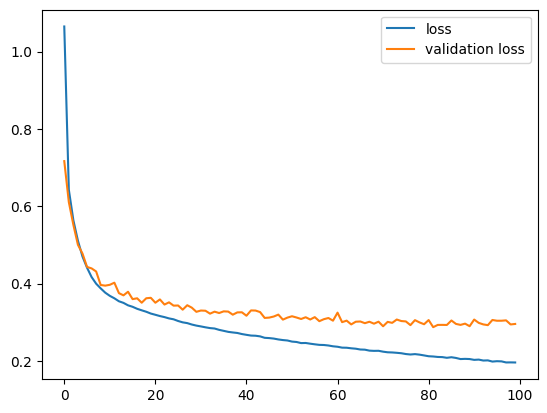

In [27]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()

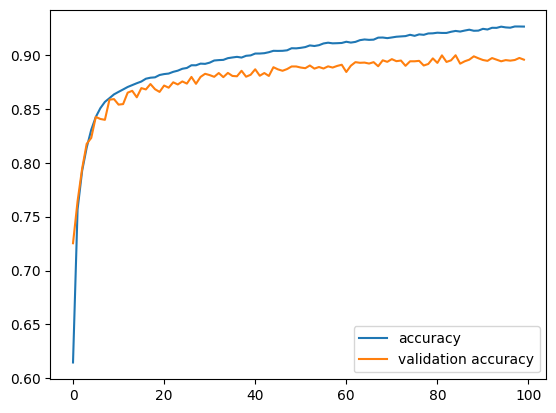

In [28]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix without normalization
[[905   2  15  14   2   1  58   0   3   0]
 [  8 977   1   7   2   0   5   0   0   0]
 [ 20   1 811  10  73   0  85   0   0   0]
 [ 38   9  18 859  41   0  32   0   3   0]
 [  0   1  68  16 831   0  84   0   0   0]
 [  0   1   0   0   0 976   0  16   2   5]
 [171   2  54  29  49   0 692   0   3   0]
 [  0   0   0   0   0  11   0 976   0  13]
 [  9   0   4   3   6   2   9   2 965   0]
 [  0   0   0   0   0   7   1  28   0 964]]


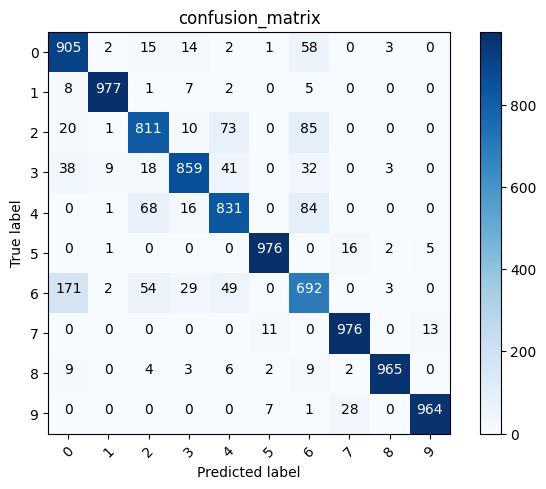

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="confusion_matrix", cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [30]:
labels= [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

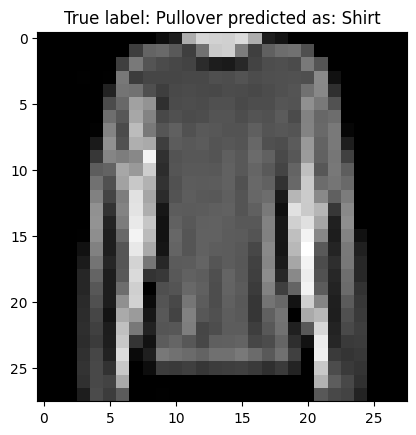

In [34]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title(f"True label: {labels[y_test[i]]} predicted as: {labels[p_test[i]]}");